# **Insight Flow**  
### **Intro to Datascience Project**  
Travis Draper  
Dane Bartholomew  
Alex Beams

## Project Motivation
We wanted to look at climate data for the state of Utah, to try and see what the climate trends have been, especially with respect to precipitation.  We wanted to see if the precipitation in the state has decreased significantly in recent years, and what it could tell us about the climate in Utah.



This is the first cell where we focused primarily on leaving code notes, and importing necessary modules for the whole document.

In [150]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
# This next line tells jupyter to render the images inline
%matplotlib inline
import numpy as np


#water years run from october-september (important for precip accumulation start of month values)
#try to use snow depth/snow water equivalent to infer temperature in the winter time, or see if they are correlated
# see if precipitation on its own is strongly predictive for temperature when that data exists; if so, use it to infer what missing values might be
#consider that in later years, more low-precipitation sites might have been added -- maybe that drives averages lower in more reent years

This next block is where we import the csv file containing all of the data we are going to work with.  There are several things that we are still trying to figure out such as how to deal with the missing data. There is also the question of trying to do web scraping to get more location data for each of the project sites.

In [151]:
#snowfall = pd.read_csv("snotel_simple.csv")
snowfall = pd.read_csv('Snotel_big.csv')
snowfall.head()

,Date,Station Id,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF)
0,Oct-94,907,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN
1,Nov-94,907,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN
2,Dec-94,907,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN
3,Jan-95,907,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN
4,Feb-95,907,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN


# Basic Data Cleanup and Early Exploratory Analysis

Here we are trying to figure out a way to work with the dates given so that we can actually run through the data as a time series.  Breaking stuff up was surprisingly difficult.

In [152]:
dat = snowfall[['Date', 'Precipitation Accumulation (in) Start of Month Values']]
grouped = dat.groupby('Date').mean()

In [153]:
dates = snowfall['Date'].str.split('-')
int(dates[0][1])

94

In [182]:
yearvec = []
for i in range(len(dates)):
    if(int(dates[i][1]) < 19):
        year = 2000 + int(dates[i][1])
    else:
        year = 1900 + int(dates[i][1])
    yearvec.append(year)

In [183]:
snowfall['year'] = yearvec

In [156]:
monthvec = []
for i in range(len(dates)):
    monthvec.append(dates[i][0])
    
snowfall['month'] = monthvec

In [237]:
print("The years of the data set span " + str(min(snowfall["year"])) + " to " + str(max(snowfall["year"])) + ".")

The years of the data set span 1978 to 2018.


In [158]:
snowfall.dropna().iloc[:,2:13].describe()

,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),year
count,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000
mean,8634.193404,15.560364,2.574157,4.835464,16.195909,40.122137,63.693316,15.717849,2011.220034
std,1052.446637,12.464006,1.981221,7.771629,22.512552,13.677888,12.699946,17.634706,4.388287
min,5972.000000,0.000000,0.000000,0.000000,0.000000,11.000000,32.000000,-40.000000,1996.000000
25%,7944.000000,5.400000,1.200000,0.000000,0.000000,28.000000,53.000000,2.000000,2008.000000
50%,8709.000000,14.000000,2.100000,0.400000,2.000000,38.000000,63.000000,15.000000,2012.000000
75%,9414.000000,22.700000,3.500000,7.500000,29.000000,52.000000,75.000000,30.000000,2015.000000
max,10943.000000,82.600000,24.600000,75.100000,173.000000,75.000000,104.000000,56.000000,2018.000000


In [159]:
snowfall.dropna().iloc[:,2:11].corr()

,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF)
Elevation (ft),1.000000,-0.074690,-0.031348,0.067861,0.097964,-0.189102,-0.219786,-0.173244
Precipitation Accumulation (in) Start of Month Values,-0.074690,1.000000,-0.037268,0.276449,0.166702,0.544178,0.501250,0.542718
Precipitation Increment (in),-0.031348,-0.037268,1.000000,0.322147,0.350026,-0.365234,-0.365270,-0.288649
Snow Water Equivalent (in) Start of Month Values,0.067861,0.276449,0.322147,1.000000,0.951803,-0.343837,-0.342939,-0.290643
Snow Depth (in) Start of Month Values,0.097964,0.166702,0.350026,0.951803,1.000000,-0.483034,-0.480342,-0.429696
Air Temperature Average (degF),-0.189102,0.544178,-0.365234,-0.343837,-0.483034,1.000000,0.955370,0.949459
Air Temperature Maximum (degF),-0.219786,0.501250,-0.365270,-0.342939,-0.480342,0.955370,1.000000,0.873754
Air Temperature Minimum (degF),-0.173244,0.542718,-0.288649,-0.290643,-0.429696,0.949459,0.873754,1.000000


Here we get the first early data exploration.  The precipitation increment is the value that we are most interested in here for actually calculating rainfall, and snowfall.  We still have a lot of work to do before we can fully work on the temperature data. The Precipitation Increment is the amount of rainfall or snowfall that occurs within a given month.  It is measured at the end of each month.

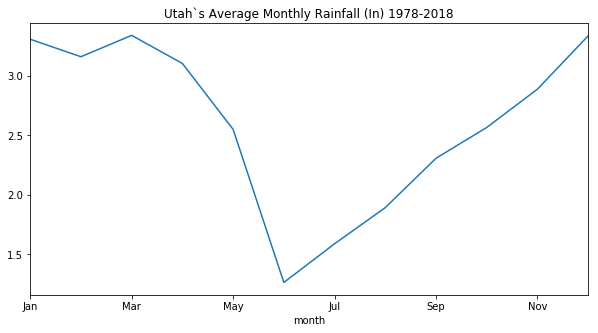

In [180]:
monthgroups = snowfall.groupby('month')
monthprecips = monthgroups['Precipitation Increment (in)'].mean()
monthprecips.index = pd.CategoricalIndex(monthprecips.index,
                                        categories = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                        sorted = True)
monthprecips.sort_index().plot(figsize = (10,5), title = 'Utah`s Average Monthly Rainfall (In) 1978-2018')

Average rainfall was averaged over all locations in the state, over all the years data were available.  Clearly the summer months yield much less precipitation than other months in the year.

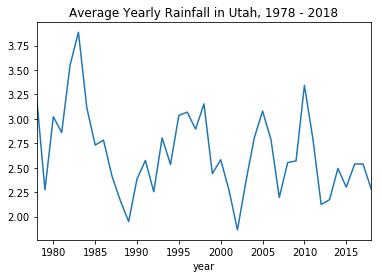

In [177]:
yeargroups = snowfall.groupby('year')
yearprecips = yeargroups['Precipitation Increment (in)'].mean()
yearprecips.plot(title = 'Average Yearly Rainfall in Utah, 1978 - 2018')

There appear to be significant cycles of wet and dry years, with a significant increase in precipitation during the early 1980's.

In [162]:
stationgroups = snowfall.groupby('Station Name')
stationPrecips = stationgroups['Precipitation Increment (in)'].mean()

stats = pd.DataFrame({'Precipitation Increment (in.) for Utah':['mean','min','max','standard deviation'],
                      'Values':[stationPrecips.mean(), min(stationPrecips), max(stationPrecips), np.std(stationPrecips)]})
stats

,Precipitation Increment (in.) for Utah,Values
0,mean,2.510117
1,min,1.330769
2,max,5.045666
3,standard deviation,0.632711


We can see here below that at least in one dimension there doesn't seem to be a relationship between average precipitation and elevation, which would make sense.  We think that we should be able to find a way to fit precipitation data once we have latitude and longitude data.  

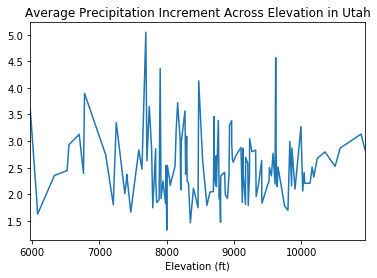

In [189]:
elevationgroups = snowfall.groupby('Elevation (ft)')
elevationPrecips = elevationgroups['Precipitation Increment (in)'].mean()
elevationPrecips.plot(title = 'Average Precipitation Increment Across Elevation in Utah')

Temperature data begin in 1996


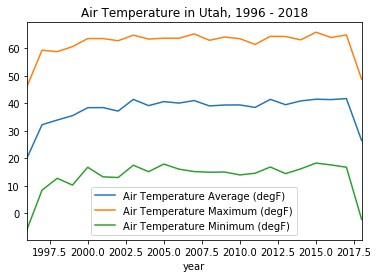

In [164]:
yeargroups = snowfall.dropna().groupby('year')
yearprecips = yeargroups[['Air Temperature Average (degF)','Air Temperature Maximum (degF)',
                         'Air Temperature Minimum (degF)']].mean()
yearprecips.plot(title = 'Air Temperature in Utah, 1996 - 2018')
print('Temperature data begin in '+ str(min(snowfall.dropna()['year'])))

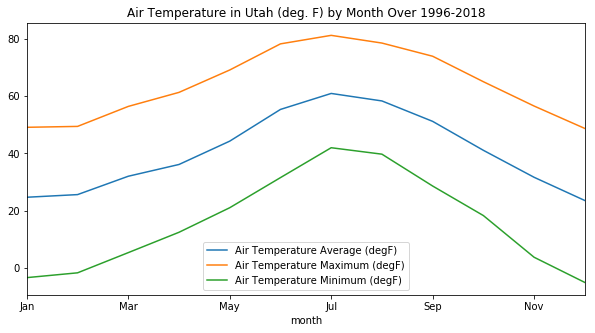

In [187]:
monthGroups = snowfall.dropna().groupby('month')
monthTemps = monthGroups[['Air Temperature Average (degF)','Air Temperature Maximum (degF)',
                         'Air Temperature Minimum (degF)']].mean()
monthTemps.index = pd.CategoricalIndex(monthprecips.index,
                                        categories = ['Jan','Feb','Mar','Apr','May','Jun',
                                                      'Jul','Aug','Sep','Oct','Nov','Dec'],
                                        sorted = True)
monthTemps.sort_index().plot(figsize = (10,5), title = 'Air Temperature in Utah (deg. F) by Month Over 1996-2018') #.axhline(y=32)



Temperature data begin in 1996


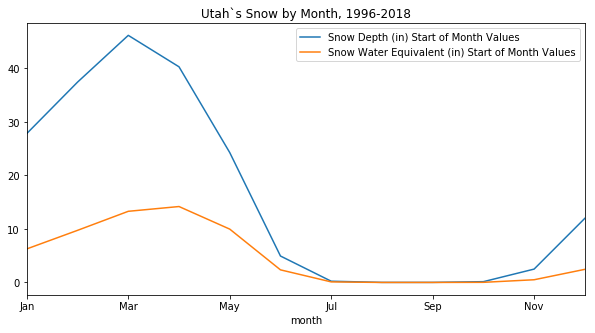

In [244]:
monthlySnow = snowfall.dropna().groupby('month')[['Snow Depth (in) Start of Month Values', 
                                                  'Snow Water Equivalent (in) Start of Month Values']].mean()

monthlySnow.index = pd.CategoricalIndex(monthprecips.index,
                                        categories = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                                        sorted = True)
monthlySnow.sort_index().plot(figsize = (10,5), title = 'Utah`s Snow by Month, 1996-2018')
print('Temperature data begin in '+ str(min(snowfall.dropna()['year'])))

Notice how snow depth peaks at the start of March, just when air temperatures begin to rise signifiantly.

# Web Scraping and Merging Datasets

This is the part of the document where we are starting to do the web scraping.  The original data set does not include latitude or longitude data for the sites, so we need to scrape that information from the webpages for the individual SNOTEL sites if we want to learn whether geographic location of the sites has any effect on precipitation or snowfall.

We are able to get the websites easily enough, but it turns out that extracting the latitude and longitude data from the HTML is harder than we had anticipated, since those numbers are not between any type of HTML tag.  This has made using BeautifulSoup much harder than we initially had anticipated.  No problem, though -- we can use Regular Expressions (RegEx) to extract the numbers. Further below, we find a way to remove the junk from these and add them to the dataframe.

Note:  we saved the HTML webpages so that you do not need to run the (commented out) code just below -- see the bold header further down.

In [98]:
stationids = snowfall['Station Id']
stationList = stationids.unique()

In [99]:
import time
import requests
import urllib.request
from bs4 import BeautifulSoup

In [100]:
urls = []
for item in stationList:
    urls.append('https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=' + str(item) + '&state=ut')
    

In [101]:
len(urls)

132

In [102]:
# responses = []
# for idx, url in enumerate(urls):
#    response = requests.get(url)
#    responses.append(response.text)
#    print('got the webpage')
#    if idx%10 == 0 and idx != 0:
#        time.sleep(2)
        

In [103]:
# with open('sitePages.html', 'w') as my_file:
#     my_file.write(str(responses))

In [32]:
soups = []
for response in responses:
    soup = BeautifulSoup(response, 'lxml')
    soups.append(soup)

In [24]:
# for br in soup.findAll('br'):
#     next_s = br.nextSibling
#     if not (next_s and isinstance(next_s,BeautifulSoup.NavigableString)):
#         continue
#     next2_s = next_s.nextSibling
#     if next2_s and isinstance(next2_s,Tag) and next2_s.name == 'br':
#         text = str(next_s).strip()
#         if text:
#             print("Found:", next_s)

AttributeError: type object 'BeautifulSoup' has no attribute 'NavigableString'

In [25]:
# row =  soups[0].find_all('td valign="top"', string='Latitude:')
# for r in row:
#     nextSib = r.nextSibling
#     while nextSib.name != 'strong' and nextSib is not None:
#             nextSib = nextSib.nextSibling
# print(nextSib.text)

NameError: name 'nextSib' is not defined

In [26]:
# for br in soups[0].find_all('br'):
#     if str(type(br.contents[0])) == '<class \'BeautifulSoup.NavigableString\'>':
#         print(br.contents)

IndexError: list index out of range

In [33]:
import re

# latitudes = []
# longitudes = []
# for i in range(len(urls)):
#     tds = soups[i].find_all('td')
#     latitudes.append(re.findall(r"</strong> +[0-9]{2} +deg; +[0-9]{1}[\s]|</strong> +[0-9]{2} +deg; +[0-9]{2}[\s]", str(tds)))
#     longitudes.append(re.findall(r"</strong> +[0-9][0-9][0-9] +deg; +[0-9]{2} |</strong> +[0-9][0-9][0-9] +deg; +[0-9]{1}", str(tds)))

# longitudes
#latitudes

[['</strong> 112 deg; 16 ', '</strong> 112 deg; 16 '],
 ['</strong> 110 deg; 50 ', '</strong> 110 deg; 50 '],
 ['</strong> 111 deg; 33 ', '</strong> 111 deg; 33 '],
 ['</strong> 111 deg; 6', '</strong> 111 deg; 6'],
 ['</strong> 111 deg; 57 ', '</strong> 111 deg; 57 '],
 ['</strong> 111 deg; 55 ', '</strong> 111 deg; 55 '],
 ['</strong> 112 deg; 15 ', '</strong> 112 deg; 15 '],
 ['</strong> 112 deg; 21 ', '</strong> 112 deg; 21 '],
 ['</strong> 111 deg; 36 ', '</strong> 111 deg; 36 '],
 ['</strong> 110 deg; 35 ', '</strong> 110 deg; 35 '],
 ['</strong> 112 deg; 9', '</strong> 112 deg; 9'],
 ['</strong> 112 deg; 1', '</strong> 112 deg; 1'],
 ['</strong> 112 deg; 0', '</strong> 112 deg; 0'],
 ['</strong> 112 deg; 51 ', '</strong> 112 deg; 51 '],
 ['</strong> 111 deg; 35 ', '</strong> 111 deg; 35 '],
 ['</strong> 110 deg; 35 ', '</strong> 110 deg; 35 '],
 ['</strong> 111 deg; 26 ', '</strong> 111 deg; 26 '],
 ['</strong> 110 deg; 40 ', '</strong> 110 deg; 40 '],
 ['</strong> 109 deg; 27 '

In [34]:
# longitude_numeric= []
# latitude_numeric = []
# for entry in longitudes:
#     block = entry[0].split(' ')
#     result = int(block[1]) + (float(block[3])/60)
#     longitude_numeric.append(result)
    
# for entry in latitudes:
#     block = entry[0].split(' ')
#     result = int(block[1]) + (float(block[3])/60)
#     latitude_numeric.append(result)    

In [34]:
##longitudes[0][0].split(' ')
#longitude_numeric[5]

111.91666666666667

In [35]:
# with open('latitudes_num.txt', 'w') as my_file:
#     my_file.write(str(latitude_numeric))
    
# with open('longitudes_num.txt', 'w') as my_file:
#     my_file.write(str(longitude_numeric))

In [37]:
# with open('latitudes.txt', 'w') as my_file:
#     my_file.write(str(latitudes))
    
# with open('longitudes.txt', 'w') as my_file:
#     my_file.write(str(longitudes))

## Here we load the longitude/latitude text files we created 

In [196]:
with open('longitudes_num.txt','r') as data:
    longs = data.read()
test_longitude = longs.replace('[','').replace(']','').split(', ')
for idx, item in enumerate(test_longitude):
    test_longitude[idx]= float(item)
#test_longitude    

In [197]:
with open('latitudes_num.txt','r') as data:
    lats = data.read()
test_latitude = lats.replace('[','').replace(']','').split(', ')
for idx, item in enumerate(test_latitude):
    test_latitude[idx]= float(item)
#test_latitude   

Now that we have scraped the latitude and longitude data, we are going to add it to the dataframe.  We have two different dataframes --  the one that we used to create the different time series above (the 'snowfall' dataframe), and one that is built as just a list of the SNOTEL data collection sites ('sites', which gets loaded just below).

In [200]:
sites = pd.read_csv("snotel_sites.csv")

In [201]:
sites['Longitude'] = test_longitude
sites['Latitude'] = test_latitude

In [202]:
siteID = []
for site in sites['Data sites']:
    sitestuff = site.replace(':','').split(' ')
    number = sitestuff[1]
    siteID.append(number)

In [203]:
sites['Site ID'] = siteID

In [204]:
sites.head(10)

,Data sites,Longitude,Latitude,Site ID
0,#\tSNOTEL 907: Agua Canyon\t UT,112.266667,37.516667,907
1,#\tSNOTEL 992: Bear River RS\t UT,110.833333,40.883333,992
2,#\tSNOTEL 329: Beaver Dams\t UT,111.550000,39.133333,329
3,#\tSNOTEL 330: Beaver Divide\t UT,111.100000,40.616667,330
4,#\tSNOTEL 332: Ben Lomond Peak\t UT,111.950000,41.383333,332
5,#\tSNOTEL 333: Ben Lomond Trail\t UT,111.916667,41.383333,333
6,#\tSNOTEL 1214: Bevans Cabin\t UT,112.250000,40.466667,1214
7,#\tSNOTEL 339: Big Flat\t UT,112.350000,38.300000,339
8,#\tSNOTEL 348: Black Flat-U.M. Ck\t UT,111.600000,38.683333,348
9,#\tSNOTEL 1162: Blacks Fork Jct\t UT,110.583333,40.950000,1162


In [206]:
sites['Site ID'] = pd.to_numeric(sites['Site ID'])

Now we create a dictionary, where the keys are the site ID numbers, and the values are the longitude/latitude data we scraped. The idea is to use this dictionary to define a mapping on the dataframe 'snowfall' which will fill new columns with latitude and longitude for each site.

In [207]:
keys = sites['Site ID']
values = sites['Longitude']
values_lat = sites['Latitude']
long_dict = dict(zip(keys,values))
lat_dict = dict(zip(keys,values_lat))

In [208]:
#long_dict
#lat_dict

Now to define the mapping we make the indexes for 'snowfall' and 'sites' both be the Site ID numbers.

In [209]:
sites.set_index('Site ID')

,Data sites,Longitude,Latitude
Site ID,,,
907,#\tSNOTEL 907: Agua Canyon\t UT,112.266667,37.516667
992,#\tSNOTEL 992: Bear River RS\t UT,110.833333,40.883333
329,#\tSNOTEL 329: Beaver Dams\t UT,111.550000,39.133333
330,#\tSNOTEL 330: Beaver Divide\t UT,111.100000,40.616667
332,#\tSNOTEL 332: Ben Lomond Peak\t UT,111.950000,41.383333
333,#\tSNOTEL 333: Ben Lomond Trail\t UT,111.916667,41.383333
1214,#\tSNOTEL 1214: Bevans Cabin\t UT,112.250000,40.466667
339,#\tSNOTEL 339: Big Flat\t UT,112.350000,38.300000
348,#\tSNOTEL 348: Black Flat-U.M. Ck\t UT,111.600000,38.683333


In [210]:
snowfall.set_index('Station Id')

,Date,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),year,month
Station Id,,,,,,,,,,,,
907,Oct-94,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN,1994,Oct
907,Nov-94,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN,1994,Nov
907,Dec-94,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN,1994,Dec
907,Jan-95,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN,1995,Jan
907,Feb-95,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN,1995,Feb
907,Mar-95,Agua Canyon,8900,16.1,5.1,12.5,NaN,NaN,NaN,NaN,1995,Mar
907,Apr-95,Agua Canyon,8900,21.2,2.7,15.5,NaN,NaN,NaN,NaN,1995,Apr
907,May-95,Agua Canyon,8900,23.9,1.9,5.8,NaN,NaN,NaN,NaN,1995,May
907,Jun-95,Agua Canyon,8900,25.8,1.2,0.0,NaN,NaN,NaN,NaN,1995,Jun


In [211]:
snowfall['Longitude'] = np.nan
snowfall['Latitude'] = np.nan

In [212]:
snowfall['Longitude'] = snowfall['Station Id'].map(long_dict)
snowfall['Latitude'] = snowfall['Station Id'].map(lat_dict)

In [213]:
sites.dtypes

Data sites     object
Longitude     float64
Latitude      float64
Site ID         int64
dtype: object

Look!  Now the longitude and latitude are in 'snowfall'.

In [214]:
snowfall.head()

,Date,Station Id,Station Name,Elevation (ft),Precipitation Accumulation (in) Start of Month Values,Precipitation Increment (in),Snow Water Equivalent (in) Start of Month Values,Snow Depth (in) Start of Month Values,Air Temperature Average (degF),Air Temperature Maximum (degF),Air Temperature Minimum (degF),year,month,Longitude,Latitude
0,Oct-94,907,Agua Canyon,8900,0.0,2.0,0.0,NaN,NaN,NaN,NaN,1994,Oct,112.266667,37.516667
1,Nov-94,907,Agua Canyon,8900,2.0,2.8,0.0,NaN,NaN,NaN,NaN,1994,Nov,112.266667,37.516667
2,Dec-94,907,Agua Canyon,8900,4.8,2.7,2.3,NaN,NaN,NaN,NaN,1994,Dec,112.266667,37.516667
3,Jan-95,907,Agua Canyon,8900,7.5,5.6,4.7,NaN,NaN,NaN,NaN,1995,Jan,112.266667,37.516667
4,Feb-95,907,Agua Canyon,8900,13.1,3.0,10.5,NaN,NaN,NaN,NaN,1995,Feb,112.266667,37.516667


# Unsupervised Learning (Cluster Analysis) and Visualization
### We finally had a useful dataset that could be used to analyze more interesting trends

Basically, we want to investigate whether the data can discern different climates in the state.  Are some areas very wet?  Are some of the sites in desert regions?  If the SNOTEL sites can be grouped into different clusters based on precipitation, snowfall, temperature, and so on, it stands to reason that the state has qualitatively distinct climates.

Text(0.5,1,'Coordinates of SNOTEL Sites')

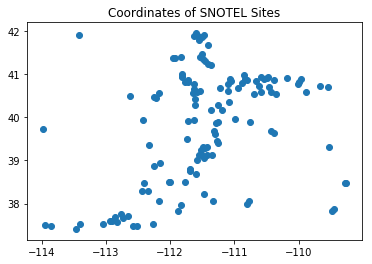

In [235]:
plt.scatter(sites['Longitude'],sites['Latitude'])
plt.title('Coordinates of SNOTEL Sites')

Now that we have a rudimentary plot, we will use the plotly package to create a much nicer looking plot that overlays the site locations over a map of the state.  
(In order to see the map, you may need to first install plotly)
### Please Zoom in on the map.

In [236]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = sites['Longitude'],
        lat = sites['Latitude'],
        text = stationPrecips,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = stationPrecips,
            cmax = max(stationPrecips),
            colorbar=dict(
                title="Average Monthly Precipitation"
            )
        ))]

layout = dict(
        title = 'Snotel Sites (please zoom in)',
        colorbar = False,
        geo = dict(
            scope='utah',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(240, 240, 240)",
            subunitcolor = "rgb(170, 170, 170)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='snotel sites' )

See how the north generally seems to get more precipitation than other areas in the state?  Also, this map looks surprisingly similar to another map we've seen:  

![Population density map Utah](Utah-State-Population-Density-Map.jpg)  
It would seem that the snotel sites are concentrated along areas of the state where the population is greater. This would make sense given that within the state, most agricultural activity happens quite close to established population centers.   
We can compare the locations of the collection points to the data on a few more maps such as an elevation map of utah
![Elevation Relief Map Utah](State Elevation Map.jpg)  
You might notice that both people and these stations seem to follow along with the locations of a major mountain range running from the northeast to the southwest.

In [241]:
print('The lowest-elevation station is at ' + str(snowfall['Elevation (ft)'].min()) + ' ft')

The lowest-elevation station is at 5972 ft


So, some of the lowest areas in the state are not represnted by the station data.

In [242]:
#snowfall.to_csv('full dataset.csv')
snowfall = pd.read_csv('full dataset.csv')
sites = pd.read_csv('siteLoc.csv')

ValueError: scatter requires and x and y column

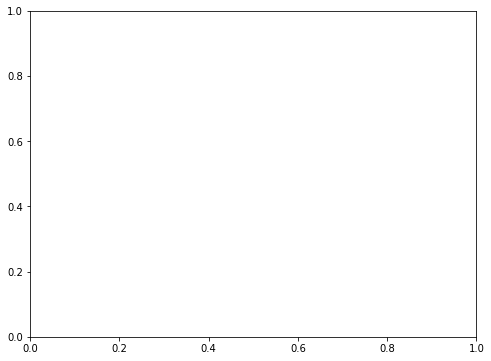

In [266]:
yeargroups = snowfall[['Station Id','year','Precipitation Increment (in)']].groupby('Station Id')

#for group in yeargroups:
#    group['Precipitation Accumulation (in) Start of Month Values'].max().plot(figsize=(20,10))
#plt.show()
#yeargroups.agg().head()

fig, ax = plt.subplots(figsize=(8,6))
bp = yeargroups.plot(kind='scatter', ax=ax)

This plot shows the total rainfall by station each year, it is a messy plot, but you can see some trends occurring.  The low portion on the right end of the graph is indicative of the partial water year beginning in october 2017 that has yet to finish.

# Preparing the Dataset for Clustering Analysis

In [221]:
siteSet = snowfall.groupby('Station Id')
sitePrecip = siteSet['Precipitation Increment (in)'].mean()
sitePrecip
#sites['Avg Precip'] = sitePrecip
#sites

#Change longitude values to negative
sites[['Longitude']] *= -1

values_precip = sitePrecip
precip_dict = dict(zip(keys,values_precip))
precip_dict
sites['Avg Precip'] = sites['Site ID'].map(precip_dict)
siteEl = siteSet['Elevation (ft)'].max()
sites['Elevation'] = siteEl
values_el = siteEl
el_dict = dict(zip(keys,values_el))
sites['Elevation'] = sites['Site ID'].map(el_dict)
sites

,Unnamed: 0,Unnamed: 0.1,Data sites,Longitude,Latitude,Site ID,Avg Precip,Elevation
0,0,0,#\tSNOTEL 907: Agua Canyon\t UT,112.266667,37.516667,907,2.300000,7990
1,1,1,#\tSNOTEL 992: Bear River RS\t UT,110.833333,40.883333,992,2.379915,8280
2,2,2,#\tSNOTEL 329: Beaver Dams\t UT,111.550000,39.133333,329,5.045666,7689
3,3,3,#\tSNOTEL 330: Beaver Divide\t UT,111.100000,40.616667,330,3.608909,5972
4,4,4,#\tSNOTEL 332: Ben Lomond Peak\t UT,111.950000,41.383333,332,2.796368,10349
5,5,5,#\tSNOTEL 333: Ben Lomond Trail\t UT,111.916667,41.383333,333,1.834234,9414
6,6,6,#\tSNOTEL 1214: Bevans Cabin\t UT,112.250000,40.466667,1214,2.159243,9853
7,7,7,#\tSNOTEL 339: Big Flat\t UT,112.350000,38.300000,339,3.390186,8766
8,8,8,#\tSNOTEL 348: Black Flat-U.M. Ck\t UT,111.600000,38.683333,348,2.868710,10574
9,9,9,#\tSNOTEL 1162: Blacks Fork Jct\t UT,110.583333,40.950000,1162,2.638511,9409


In [222]:
#sites.to_csv('siteLoc.csv')

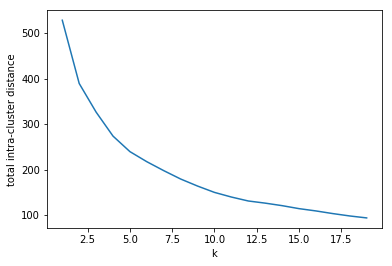

In [223]:
#This code block contains K-means clustering analysis on sites data.
#Should be placed in Exploratory Analysis section of final document

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import scale

sites = pd.read_csv("siteLoc.csv")

k_data = sites[["Elevation","Avg Precip","Longitude","Latitude"]]
#X = k_data.as_matrix()
X = scale(k_data.as_matrix())
#print(X)

#Determine best K value for K-means clustering analysis
ks = range(1,20)
scores = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=100)
    model.fit_predict(X)
    scores.append(-model.score(X))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

The rate of change in intra-cluster distance begins to diminish after 12. So we'll run a K-means clustering test with k = 12 clusters and visualize the results on two separate plots. One for latitude and longitude. One for elevation and average precipitation.

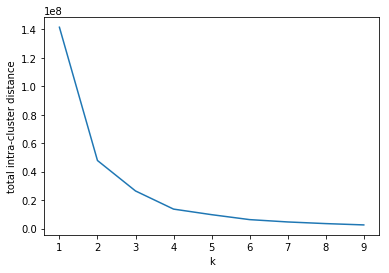

In [224]:
#Here is the same test but without scaling

X_ns = k_data.as_matrix()

#Determine best K value for K-means clustering analysis
ks = range(1,10)
scores = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=100)
    model.fit_predict(X_ns)
    scores.append(-model.score(X_ns))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

Without scaling, the rate of change in intra-cluster distance diminishes around k = 4. Much lower than with scaling.  When plotted, the clusters are almost entirely dependent on the unscaled elevation, which has the largest numerical range of any of the factors we are using for the clustering.  This shows the importance of scaling your data.

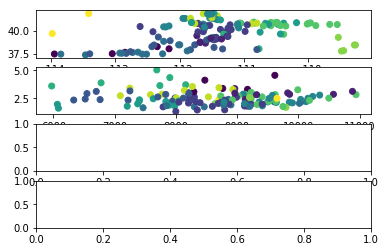

In [285]:
#Here's the K-means cluster analysis with k=12 for the scaled data. Produces two plots.

from matplotlib.colors import ListedColormap
X = scale(k_data.as_matrix())
y_pred = KMeans(n_clusters=12,n_init=100).fit_predict(X)

f, cluster_results = plt.subplots(4, sharex=False, sharey=False)

#plot latitude against longitude
cluster_results[0].scatter(k_data["Longitude"], k_data["Latitude"], c=y_pred,  marker="o")

#plot elevation against precipitation                               
cluster_results[1].scatter(k_data["Elevation"], k_data["Avg Precip"], c=y_pred,  marker="o")
                                        
plt.show()

In [286]:
sites['Elevation']
siteText = dict(zip(keys, sites['Elevation']))
siteText

siteText = ['Cluster '+str(x) + ', ' + str(y) + ' feet, '+ str(z) + ' inches precip/month' for x, y, z in zip(y_pred, sites['Elevation'], sites['Avg Precip'])]


In [287]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 240, 190)"],[0.5,"rgb(20, 200, 24)"],\
    [0.6,"rgb(190, 120, 24)"],[0.7,"rgb(200, 200, 247)"],[1,"rgb(220, 22, 11)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = sites['Longitude'],
        lat = sites['Latitude'],
        text = siteText,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = y_pred,
            cmax = max(y_pred),
            colorbar=dict(
                title="Cluster Group"
            )
        ))]

layout = dict(
        title = 'Snotel Sites (K-Means Clustering)',
        colorbar = False,
        geo = dict(
            scope='utah',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(240, 240, 240)",
            subunitcolor = "rgb(170, 170, 170)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='snotel sites' )

Among all of the clusters, cluster 5 is the most distinct, and the most compact of all of the clusters when viewed geographically, this indicates that the Uintah Mountains are the quite distinct geographically and weather wise.  

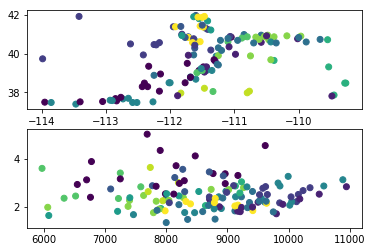

In [278]:
k_data = sites[["Elevation","Avg Precip","Longitude","Latitude"]]
#X = k_data.as_matrix()
X = scale(k_data.as_matrix())

agg_cluster_model = AgglomerativeClustering(linkage="average", affinity='correlation', n_clusters=12)
y_pred_Agg = agg_cluster_model.fit_predict(X)

f, cluster_results = plt.subplots(2, sharex=False, sharey=False)

#plot latitude against longitude
cluster_results[0].scatter(k_data["Longitude"], k_data["Latitude"], c=y_pred_Agg,  marker="o")

#plot elevation against precipitation                               
cluster_results[1].scatter(k_data["Elevation"], k_data["Avg Precip"], c=y_pred_Agg,  marker="o")
                                        
plt.show()

In [229]:
sites['Elevation']
siteText_Agg = dict(zip(keys, sites['Elevation']))
siteText

siteText_Agg = ['Cluster '+str(x) + ', ' + str(y) + ' feet, '+ str(z) + ' inches precip/month' for x, y, z in zip(y_pred_Agg, sites['Elevation'], sites['Avg Precip'])]

In [230]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 240, 190)"],[0.5,"rgb(20, 200, 24)"],\
    [0.6,"rgb(190, 120, 24)"],[0.7,"rgb(200, 200, 247)"],[1,"rgb(220, 22, 11)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = sites['Longitude'],
        lat = sites['Latitude'],
        text = siteText_Agg,
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = y_pred,
            cmax = max(y_pred),
            colorbar=dict(
                title="Cluster Group"
            )
        ))]

layout = dict(
        title = 'Snotel Sites (Agglomerative Clustering)',
        colorbar = False,
        geo = dict(
            scope='utah',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(240, 240, 240)",
            subunitcolor = "rgb(170, 170, 170)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='snotel sites' )

Even using a different clustering method we still have a cluster centered around the Uintahs.  Indicating a strong similarity between the Uintah Sites.

Text(0.5,1,'Agglomerative Clustering')

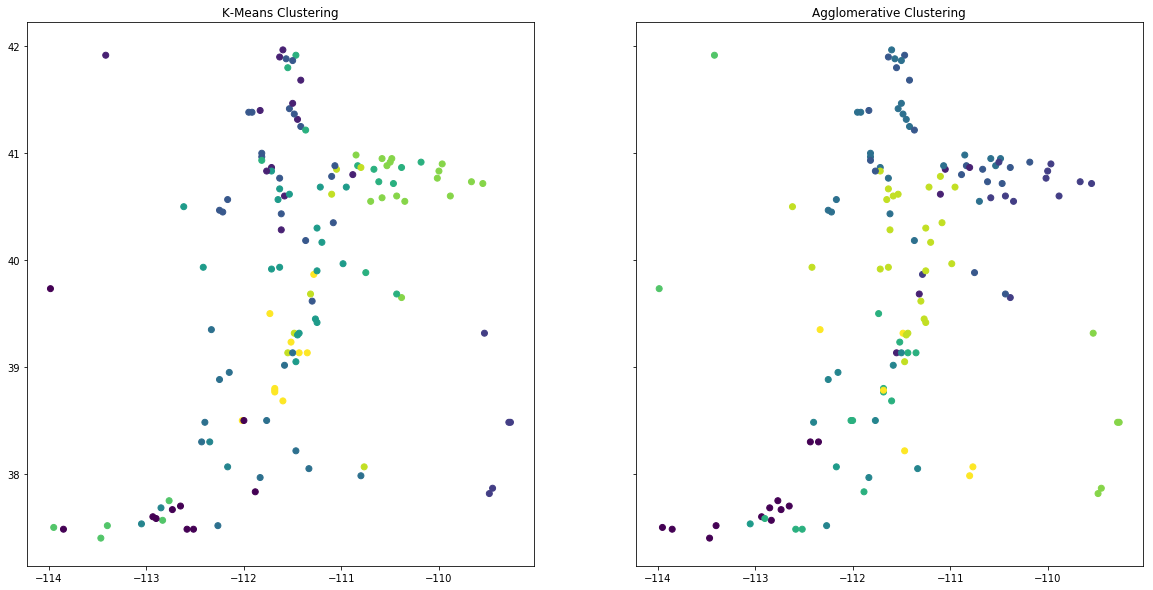

In [231]:
f, (cluster_results1, cluster_results2) = plt.subplots(1, 2, sharex=False, sharey=True,figsize=(20,10))

#plot latitude against longitude
cluster_results1.scatter(k_data["Longitude"], k_data["Latitude"], c=y_pred,  marker="o")
cluster_results1.set_title('K-Means Clustering')
cluster_results2.scatter(k_data["Longitude"], k_data["Latitude"], c=y_pred_Agg,  marker="o")
cluster_results2.set_title('Agglomerative Clustering')


Even though there is some variation in how the clusters are distributed between the two clustering methods, we still see quite a bit of similarity between the clusters generated.

Estimated number of clusters: 5


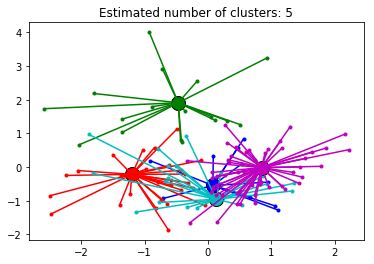

In [232]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
#                            random_state=0)
k_data = sites[["Elevation","Avg Precip","Longitude","Latitude"]]
#X = k_data.as_matrix()
X = scale(k_data.as_matrix())



# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

We attempted to run an Affinity Propagation clustering, which required a scaled version of the data, unfortunately, due to the nature of the output, we were unable to find a nice interpretation of this model.  It seems that it is creating some similar groupings to the ones we created with the otherclustering methods, but without being able to unscale the data, we are at a loss for how to fully interpret the output.

In [233]:
cluster_center

array([ 0.84755698, -0.01127163, -0.14934463,  0.47561555])

# Conclusion
We think our results were pretty heavily influenced by the placement of the stations along the most highly populated regions of the state.  If there were more stations located within the desert flatland areas of the state, we would be seeing much more interesting variation in our data. The clusters we see are not readily characterized by geographic location in the state, or by elevation. Presumably, kMeans and Agglomerative clustering were able to find similarities between groups of SNOTEL sites based on their microclimates' characteristics; but with the exception of certain groups of sites, there are no broad, generalizable distinctions to be made between the different sites.

We think there may be data may not accurately represent the climate of the state as a whole, because the stations are located in regions of agricultural interest, rather than being randomly distributed through the state. This is readily apparent upon inspecting the maps.  We also learned that weather data is not influenced by a single factor, and in fact, we often see that the clustering was very heavily influenced by the other factors available to the method making visualization very difficult.  

We had initially thought that there would be a focus on farmland, but it was quite surprising to see how heavy the focus was on populated areas.  

The Uintah Mountains seemed to be a region that was rather unique and consistently clustered together during the analysis phase.  We had been hoping to see some more sites like those, but that was the only one with such a highly persistent clustering.
## What We learned
Weather and time series data is very hard to work with, we found that simply by virtue of the difficulties in programming some things that many things that we had initially desired to have in our final project had to be dropped due to the difficulties of working with a non-uniform dataset.  

We also had to deal with a surprisingly difficult bit of web scraping, which was made challenging by the lack of any html tags around the information we wanted.  We had to use a complicated combination of BeautifulSoup and very rigid Regular Expressions to finally get the data off of the sites, it then took another while before we were actually able to get the location data which we wanted to be in a format that would allow it to be combined with the other datasets.